In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
from tabulate import tabulate

In [66]:
#funciones
def fnModa(x):
    return x.mode()[0]

def fnCV(x):
    return x.std()/x.mean()

def fnDisc(x):
    if(x>=10):
        return 1
    else:
        return 0

def fnGaussiana(x_int,X):
    # estimacion de los parametros
    mu = X.mean()
    s1 = X.std()
    # obterner la gaussiana
    A = 1/(math.sqrt(2*math.pi)*s1)
    B = -0.5*((x_int-mu)/s1)**2
    # fg = A*math.exp(B) # vectorial
    fg = [A*math.exp(B[i]) for i in range(0,x_int.shape[0])]
    return fg

def fnExponencial(x_int,X):
    # estimacion de parametros
    lamda = 1/X.mean()
    # obtener la exponencial de 1P
    fe = [lamda*math.exp(-lamda*x_int[i]) for i in range(0,x_int.shape[0])]
    return fe

def fnGumbel(x_int,X):
    # estimacion de los parametros
    mu = X.mode().max()
    beta = 0.78*X.std()
    # obtener la fn gumbel
    z = [(x_int[i]-mu)/beta for i in range(0,x_int.shape[0])] # vector
    fgum = [(1/beta)*math.exp(-(z[i]+math.exp(-z[i]))) for i in range(0,x_int.shape[0])]
    return fgum

def fnRayleigh(x_int, X):
    sig = X.std()
    A = x_int/ (sig**2)
    B = (-x_int**2)/(2*sig**2)
    fr = A * np.exp(B)

    return fr


In [67]:
#leer datos
dataMat = pd.read_csv("student-mat.csv",delimiter=';')
dataPor = pd.read_csv("student-por.csv",delimiter=';')
#seleccionar variables
dfMat = dataMat.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']]
colnames = dfMat.columns.values
#dfMat = dataMat.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']]

In [68]:
#resumen estadistico
dfMatRes = dfMat.agg(["mean",fnModa,"median","var","std",fnCV,"kurt","skew"])

# Renombrar las filas
dfMatRes = dfMatRes.rename(index={"mean": "Media",
                                  "fnModa": "Moda",
                                  "median": "Mediana",
                                  "var": "Varianza",
                                  "std": "Desviación estándar",
                                  "fnCV": "Coeficiente de variación",
                                  "kurt": "Curtosis",
                                  "skew": "Sesgo"})

dfMatRes = dfMatRes.round(3)

dfMatRes

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Media,16.696,2.749,2.522,1.448,2.035,0.334,3.944,3.235,3.109,1.481,2.291,3.554,5.709,10.909,10.714,10.415
Moda,16.000,4.000,2.000,1.000,2.000,0.000,4.000,3.000,3.000,1.000,1.000,5.000,0.000,10.000,9.000,10.000
Mediana,17.000,3.000,2.000,1.000,2.000,0.000,4.000,3.000,3.000,1.000,2.000,4.000,4.000,11.000,11.000,11.000
Varianza,1.628,1.198,1.184,0.487,0.704,0.553,0.804,0.998,1.239,0.793,1.659,1.933,64.050,11.017,14.149,20.990
Desviación estándar,1.276,1.095,1.088,0.698,0.839,0.744,0.897,0.999,1.113,0.891,1.288,1.390,8.003,3.319,3.762,4.581
Coeficiente de variación,0.076,0.398,0.432,0.482,0.412,2.225,0.227,0.309,0.358,0.601,0.562,0.391,1.402,0.304,0.351,0.440
Curtosis,-0.001,-1.090,-1.199,2.344,-0.014,5.005,1.140,-0.302,-0.770,4.759,-0.791,-1.014,21.719,-0.694,0.628,0.403
Sesgo,0.466,-0.318,-0.032,1.607,0.632,2.387,-0.952,-0.163,0.117,2.191,0.612,-0.495,3.672,0.241,-0.432,-0.733


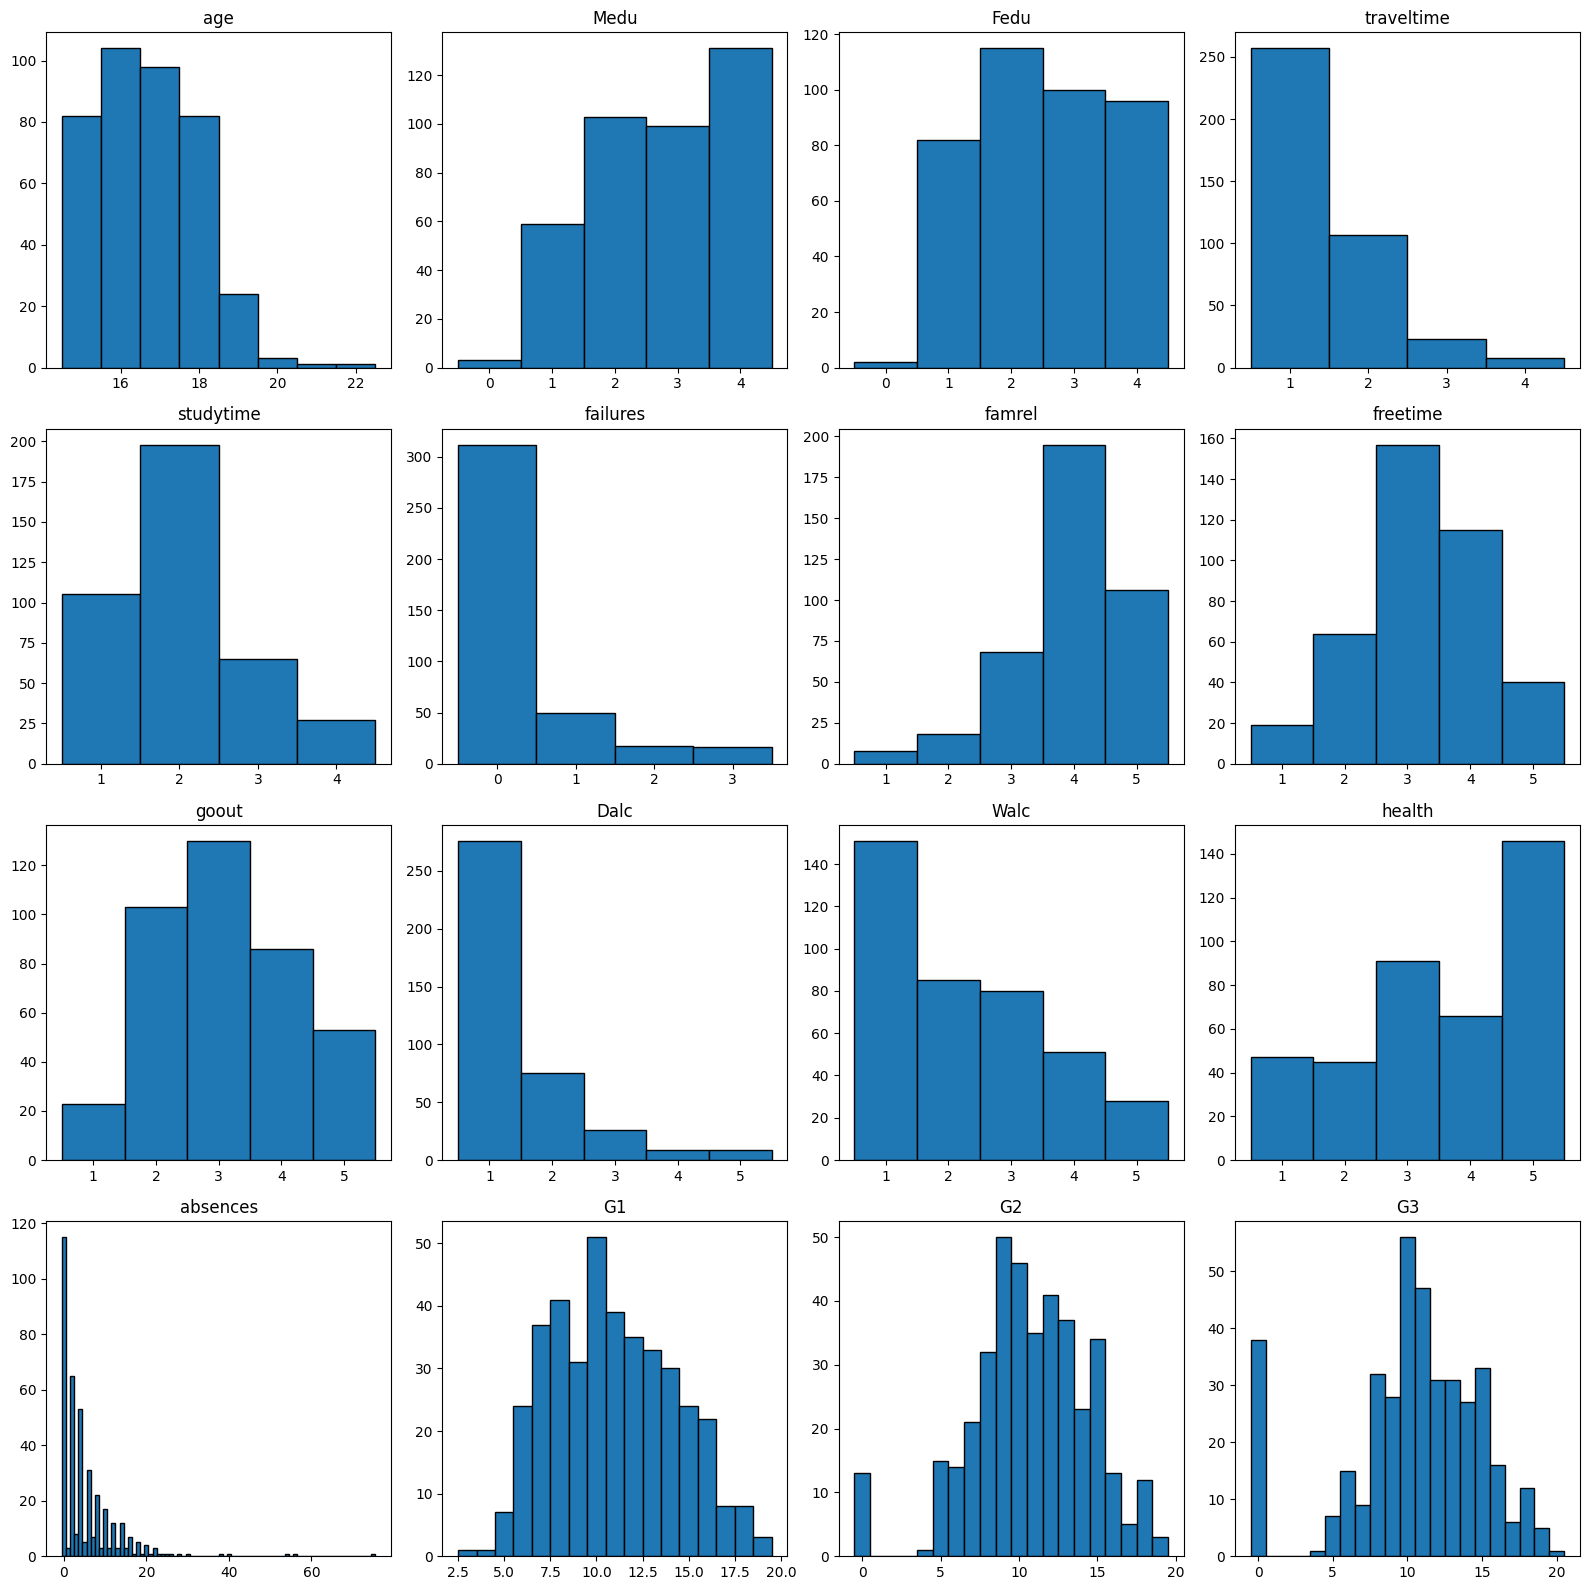

In [69]:
# Histogramas
fig, ax = plt.subplots(4, 4, figsize=(16, 16))  # Creamos una cuadrícula de subgráficos de 4x4
for i in range(len(dfMat.columns)):
    row = i // 4  # Índice de fila para el subgráfico actual
    col = i % 4   # Índice de columna para el subgráfico actual
    ax[row, col].hist(dfMat.iloc[:, i], bins=range(min(dfMat.iloc[:, i]), max(dfMat.iloc[:, i]) + 2), align='left', edgecolor="black")
    # Agregar título al gráfico
    ax[row, col].set_title(dfMat.columns[i])
plt.tight_layout()  # Ajustamos el espaciado entre subgráficos para mejorar la visualización
plt.show()

<Axes: >

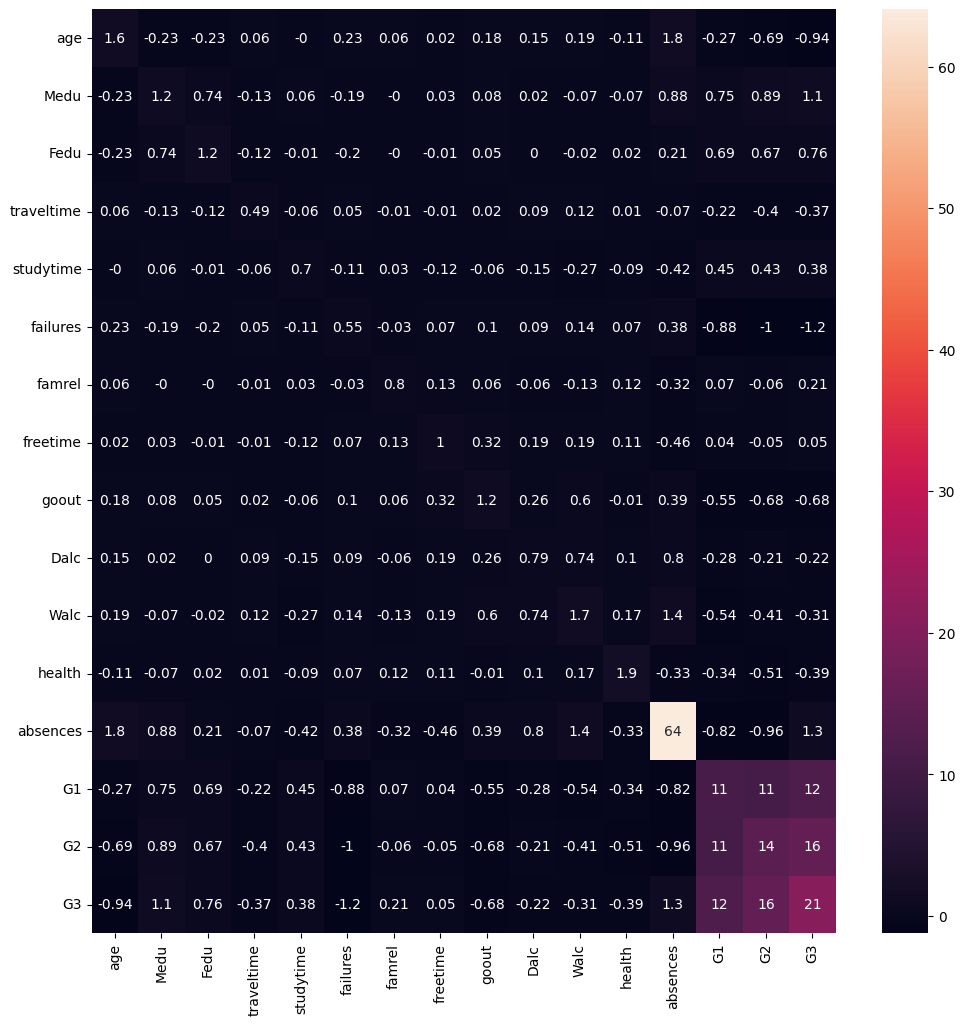

In [70]:
#Covarianza
mtxCov = dfMat.cov().round(2)
mtxCov


#Mostrar grafica covarianza
plt.figure(figsize=(12,12))
sns.heatmap(mtxCov,annot=True)

<Axes: >

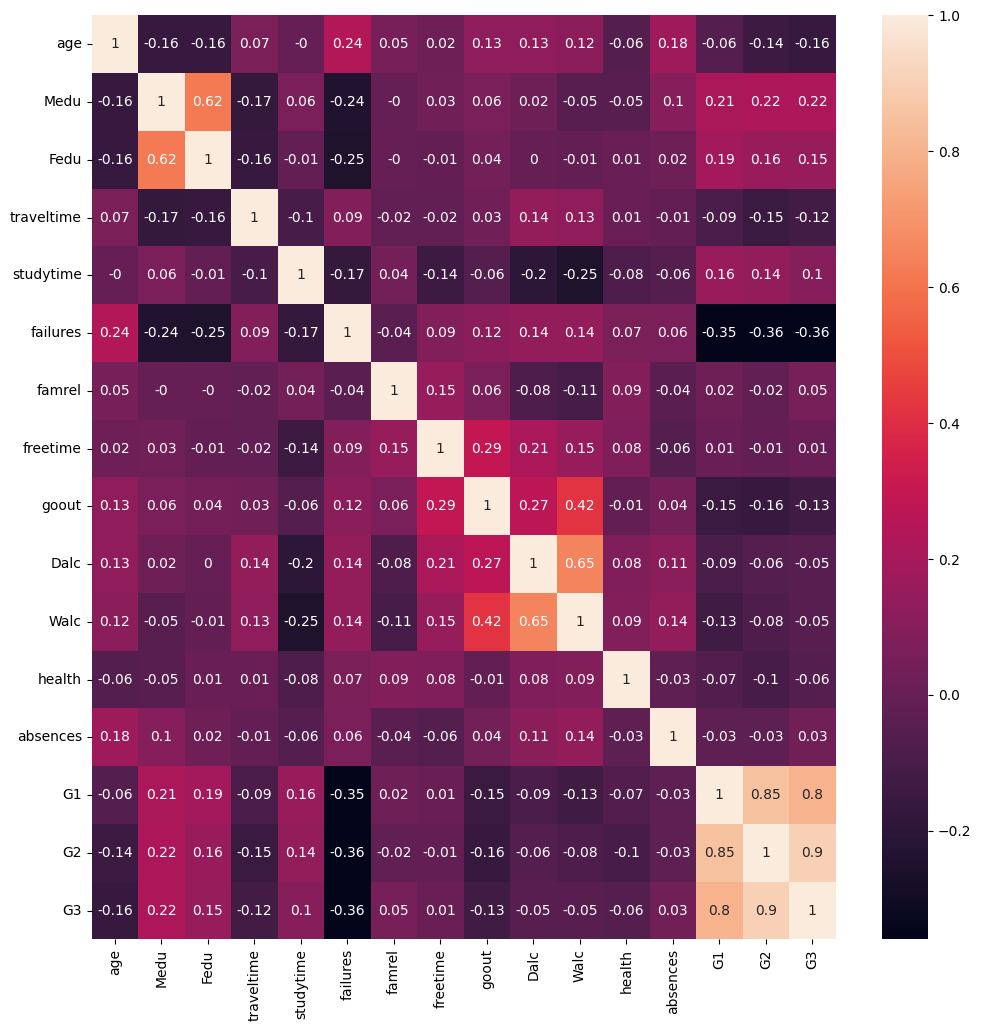

In [71]:
#Correlacion
mtxCorr = dfMat.corr().round(2)
#mtxCorr

#Mostrar grafica correlacion
plt.figure(figsize=(12,12))
sns.heatmap(mtxCorr,annot=True)

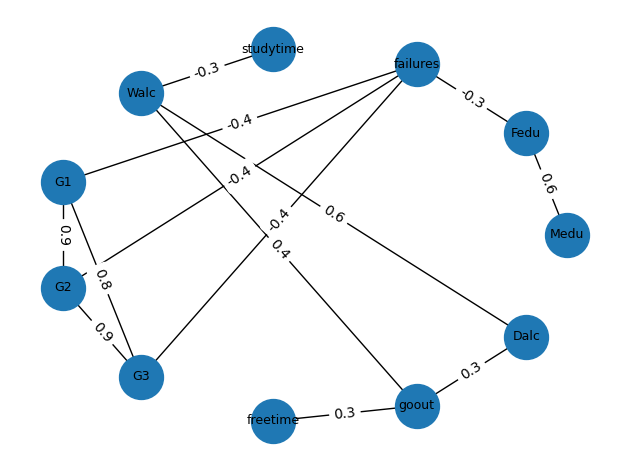

In [72]:
#grafo de correlacion
#Grafo con las dependencias más significativas
datos = dfMat.to_numpy()
mCorr = np.corrcoef(datos, rowvar=False).round(decimals=1)

dependencias = np.abs(mCorr) >= 0.3

grafo = nx.Graph()

for i in range(len(mCorr)):
    for j in range(len(mCorr)):
        if (i != j and dependencias[i, j]):
            grafo.add_edge(colnames[i], colnames[j], weight=mCorr[i,j])

pos = nx.circular_layout(grafo)

#Nodos
nx.draw_networkx_nodes(grafo, pos, node_size=1000)

#Edges
nx.draw_networkx_edges(grafo, pos, edgelist=grafo.edges)

#Node labels
nx.draw_networkx_labels(grafo, pos, font_size=9)

#Edge labels
edgeLabels = nx.get_edge_attributes(grafo,"weight")
nx.draw_networkx_edge_labels(grafo, pos, edgeLabels)


ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

16


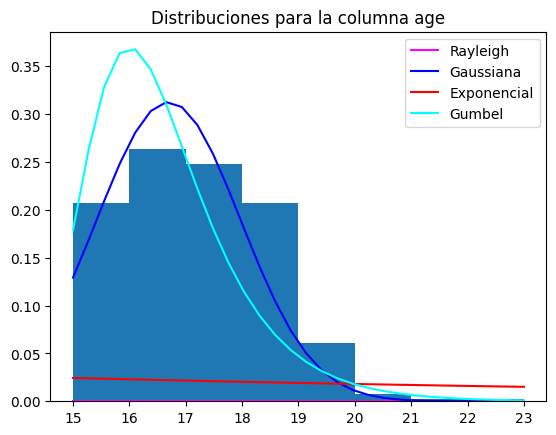

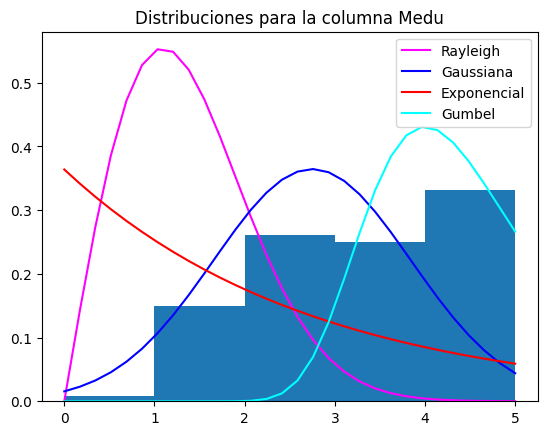

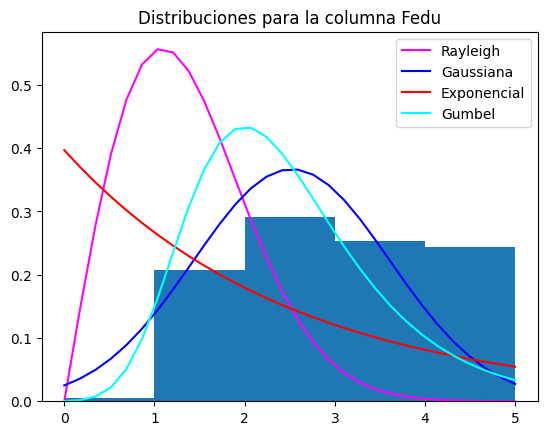

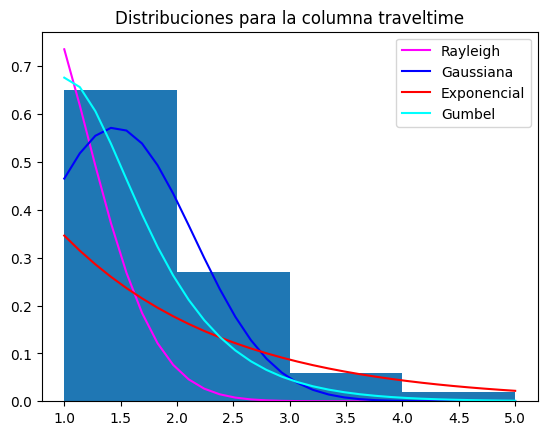

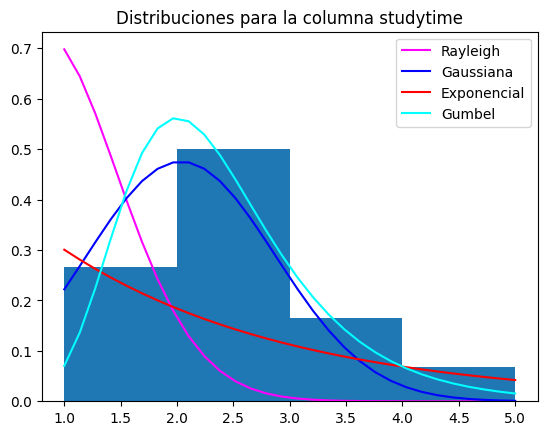

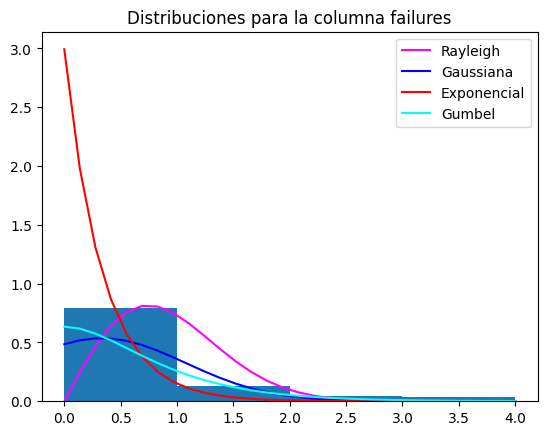

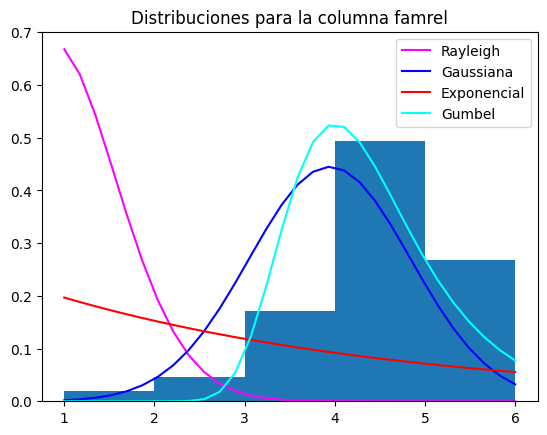

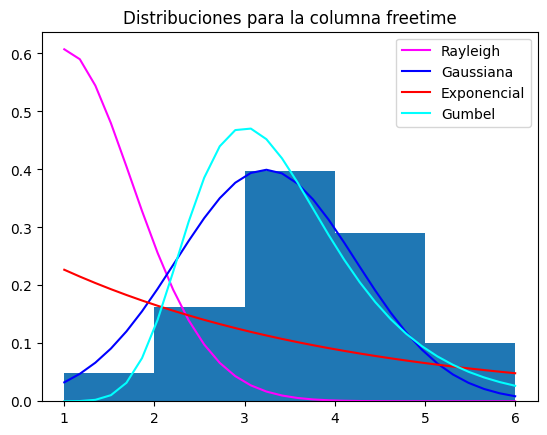

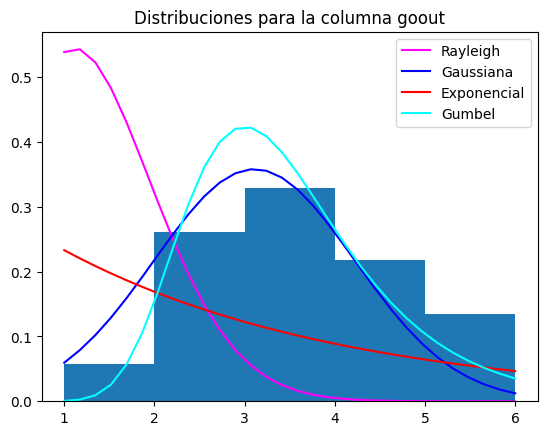

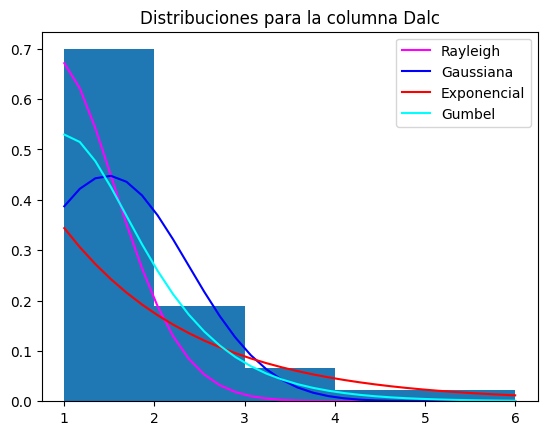

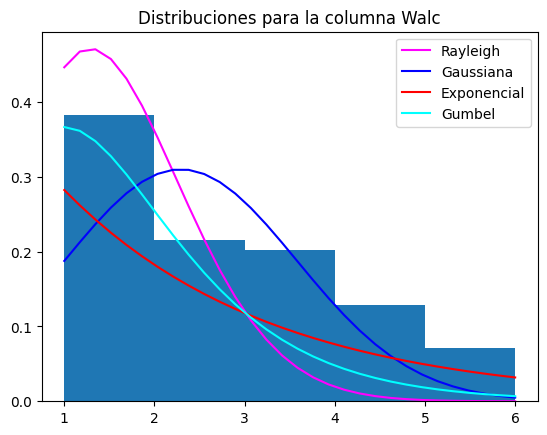

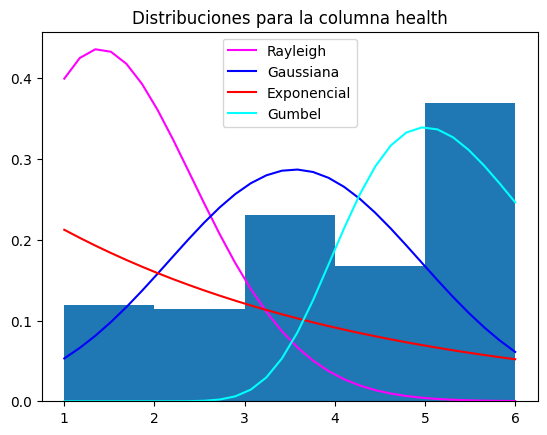

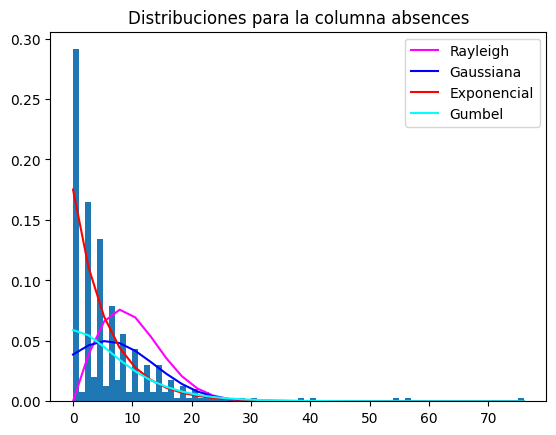

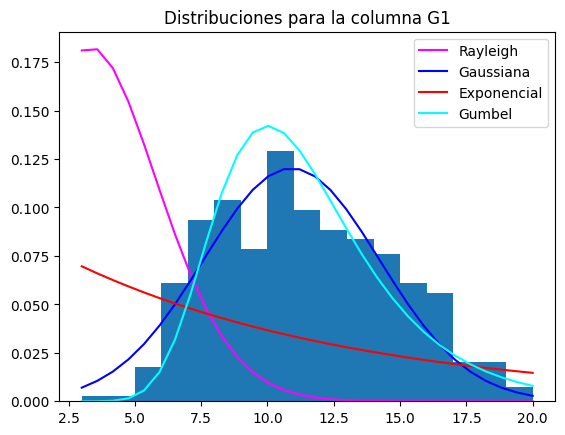

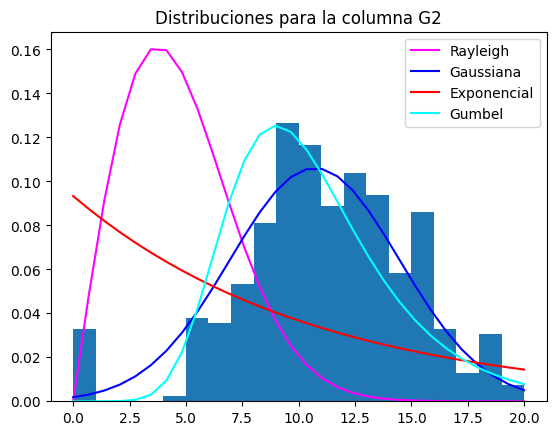

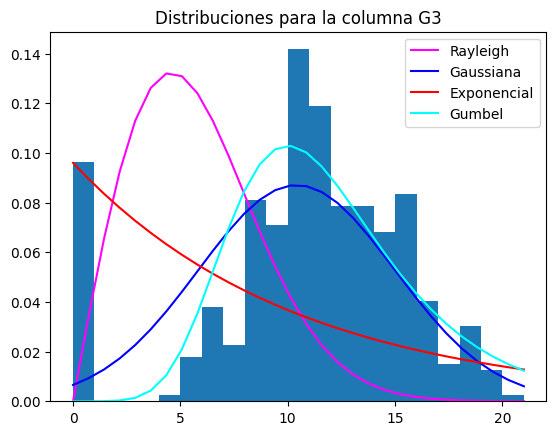

In [73]:
#distribucion de probabilidad 
df = dfMat
X = df.iloc[:,:] #Todas menos g1,g2,g3
print(len(X.columns))
#8 columnas, 4 distribuciones

for i in range(len(X.columns)):
    fig, ax = plt.subplots()
    # ax.hist(X.iloc[:,i],bins=40, density=True)
    
    bins = range(min(X.iloc[:,i]), max(X.iloc[:,i]) + 2)
    ax.hist(X.iloc[:,i], bins, density=True)

    # intervalo de los datos (rango)
    # nsize= max(X.iloc[:,i]) - min(X.iloc[:,i]) + 1
    nsize= 30
    x_int = np.linspace(min(X.iloc[:,i]), max(X.iloc[:,i]) + 1,nsize)

    # distribucion Rayleigh 
    fr = fnRayleigh(x_int,X.iloc[:,i])
    ax.plot(x_int,fr, color="magenta", label="Rayleigh")

    # distribucion normal (doña Gaussiana)
    fg = fnGaussiana(x_int,X.iloc[:,i])
    ax.plot(x_int,fg, color="blue", label="Gaussiana")

    # distribucion exponencial 1P
    fe = fnExponencial(x_int,X.iloc[:,i])
    ax.plot(x_int,fe,color='red', label="Exponencial")

    # distribucion gumbel
    fgumbel = fnGumbel(x_int,X.iloc[:,i])
    ax.plot(x_int,fgumbel,color="cyan", label="Gumbel")

    # Agregar titulo al grafico
    ax.set_title(f"Distribuciones para la columna {X.columns[i]}")

    # Mostrar el grafico
    plt.legend()
    plt.show()

In [74]:
#Discretizar la salida (G3) (Comentada para no reescribir al correr todo)
G3Col = dfMat['G3'].apply(fnDisc)
G3Col

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64

In [104]:
dfMat['G3'].value_counts().index

Index([10, 11, 0, 15, 8, 13, 12, 9, 14, 16, 6, 18, 7, 5, 17, 19, 20, 4], dtype='int64', name='G3')

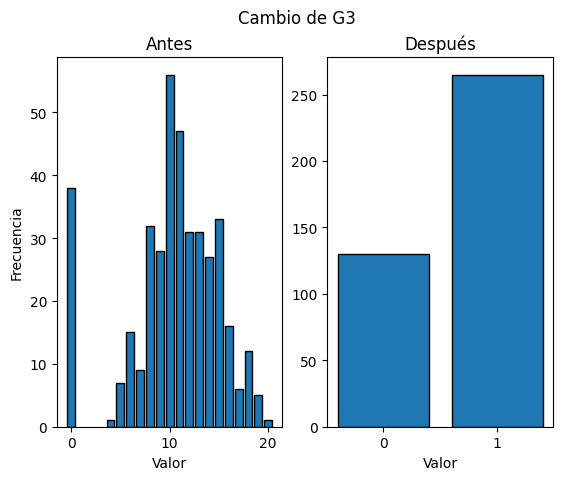

In [112]:
# Gráfico de barras G3
fig, ax = plt.subplots(1,2)



#Antes
frecuencias = dfMat['G3'].value_counts()
ax[0].bar(frecuencias.index, frecuencias.values, edgecolor='black')
ax[0].set_xticks(np.linspace(min(frecuencias.index), max(frecuencias.index), num=3))
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Antes')

#Despues
frecuencias = G3Col.value_counts()
ax[1].bar(frecuencias.index, frecuencias.values, edgecolor='black')
ax[1].set_xticks(frecuencias.index)
ax[1].set_xlabel('Valor')
ax[1].set_title('Después')

fig.suptitle('Cambio de G3')
plt.show()


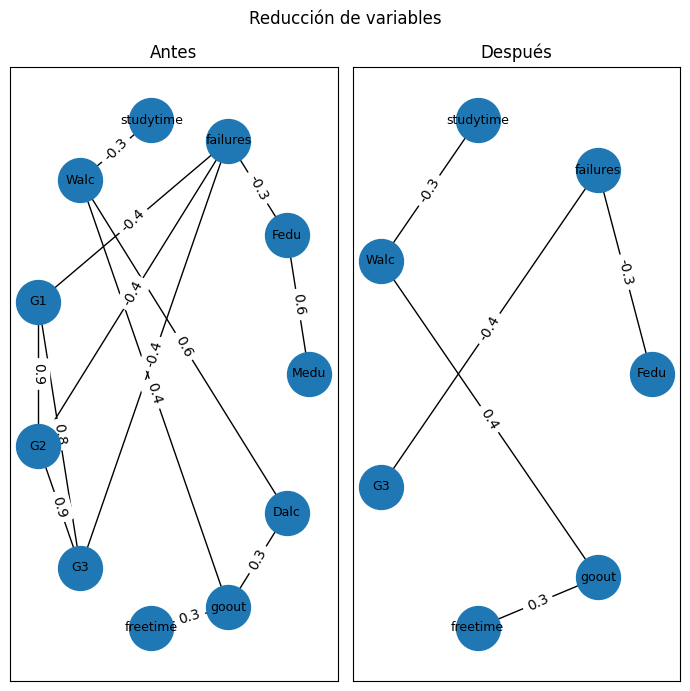

In [150]:
#Grafo de dependecias despues de descartar variables

# exclude name and food_id column
dfNuevo = dfMat.loc[:, ~dfMat.columns.isin(['G1', 'G2', 'Medu', 'Dalc'])]

fig, ax = plt.subplots(1,2, figsize=(7,7))

############# Grafo anterior
datos = dfMat.to_numpy()
mCorr = np.corrcoef(datos, rowvar=False).round(decimals=1)

dependencias = np.abs(mCorr) >= 0.3

grafo = nx.Graph()

#Nodos y aristas
for i in range(len(mCorr)):
    for j in range(len(mCorr)):
        if (i != j and dependencias[i, j]):
            grafo.add_edge(colnames[i], colnames[j], weight=mCorr[i,j])

pos = nx.circular_layout(grafo)

ax[0].set_title('Antes')

#Nodos
nx.draw_networkx_nodes(grafo, pos, ax=ax[0], node_size=1000)

#Edges
nx.draw_networkx_edges(grafo, pos, ax=ax[0], edgelist=grafo.edges)

#Node labels
nx.draw_networkx_labels(grafo, pos, ax=ax[0], font_size=9)

#Edge labels
edgeLabels = nx.get_edge_attributes(grafo,"weight")
nx.draw_networkx_edge_labels(grafo, pos, ax=ax[0], edge_labels=edgeLabels)

# ax[0].axis("off")

############# Grafo nuevo
datosNuevos = dfNuevo.to_numpy()
mCorrNueva = np.corrcoef(datosNuevos, rowvar=False).round(decimals=1)

dependenciasNuevas = np.abs(mCorrNueva) >= 0.3
colnamesNuevo = dfNuevo.columns.values

grafoNuevo = nx.Graph()

#Nodos y aristas
for i in range(len(mCorrNueva)):
    for j in range(len(mCorrNueva)):
        if (i != j and dependenciasNuevas[i, j]):
            grafoNuevo.add_edge(colnamesNuevo[i], colnamesNuevo[j], weight=mCorrNueva[i,j])

posNueva = nx.circular_layout(grafoNuevo)

ax[1].set_title('Después')

#Nodos
nx.draw_networkx_nodes(grafoNuevo, posNueva, ax=ax[1], node_size=1000)

#Edges
nx.draw_networkx_edges(grafoNuevo, posNueva, ax=ax[1], edgelist=grafoNuevo.edges)

#Node labels
nx.draw_networkx_labels(grafoNuevo, posNueva, ax=ax[1], font_size=9)

#Edge labels
edgeLabels = nx.get_edge_attributes(grafoNuevo,"weight")
nx.draw_networkx_edge_labels(grafoNuevo, posNueva, ax=ax[1], edge_labels=edgeLabels)


# ax[1].axis("off")

fig.suptitle('Reducción de variables')
plt.tight_layout()
plt.show()